In [4]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib as mpl

# Table of Contents
>## 1. Highly Imbalanced Data

>## 2. `imblearn` package
* 2.1. Under-Sampling
* 2.2. Over-Sampling
* 2.3. Combined Sampling

# 1. Highly Imbalanced Data
* Highly imbalanced data
  * Accuracy: HIGH
  * Recall-rate of the rare class: LOW

In [5]:
from sklearn.datasets import make_classification

X00, y00 = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                               n_classes=2, n_clusters_per_class=1, class_sep=0.8, 
                               weights=[0.99, 0.01], random_state=0)

from sklearn.model_selection import train_test_split

X0, X_test, y0, y_test = train_test_split(X00, y00, test_size=0.25)

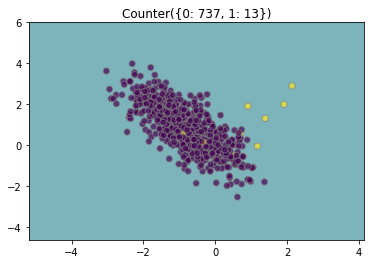

In [6]:
from collections import Counter
from sklearn.svm import SVC

x1_min = X00[:, 0].min() - 2
x1_max = X00[:, 0].max() + 2
x2_min = X00[:, 1].min() - 2
x2_max = X00[:, 1].max() + 2

def plot_samples(X=None, y=None):
    XX, YY = np.mgrid[x1_min:x1_max:300j, x2_min:x2_max:300j]
    if X is None:
        X = X0
        model = SVC(kernel="linear").fit(X0, y0)
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.contourf(XX, YY, Z, alpha=0.6)
        plt.scatter(X0[:, 0], X0[:, 1], marker='o', c=y0, s=40, 
                    linewidth=1, edgecolor='gray', alpha=0.7)
        plt.title(Counter(y0))
    else:
        plt.subplot(121)
        model = SVC(kernel="linear").fit(X0, y0)
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.contourf(XX, YY, Z, alpha=0.6)
        plt.scatter(X0[:, 0], X0[:, 1], marker='o', c=y0, s=40, 
                    linewidth=1, edgecolor='gray', alpha=0.7)
        plt.xlim(-2, 4)
        plt.ylim(-3, 4)
        plt.title(Counter(y0))
        plt.subplot(122)
        model = SVC(kernel="linear").fit(X, y)
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.contourf(XX, YY, Z, alpha=0.6)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=40, 
                    linewidth=1, edgecolor='gray', alpha=0.7)
        plt.xlim(-2, 4)
        plt.ylim(-3, 4)
        plt.title(Counter(y))
        plt.tight_layout()
    plt.show()
    
    return model.predict(X)
    
y_pred = plot_samples()

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y0, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       737
          1       0.00      0.00      0.00        13

avg / total       0.97      0.98      0.97       750



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 2. `imblearn` package
* Python package that helps dealing with imbalanced data
```
pip install -U imbalanced-learn
```

## 2.1. Under-Sampling
* `RandomUnderSampler`: random under-sampling method
* `TomekLinks`: Tomek’s link method
* `CondensedNearestNeighbour`: condensed nearest neighbour method
* `OneSidedSelection`: under-sampling based on one-sided selection method
* `EditedNearestNeighbours`: edited nearest neighbour method
* `NeighbourhoodCleaningRule`: neighbourhood cleaning rule

In [9]:
from imblearn.under_sampling import *

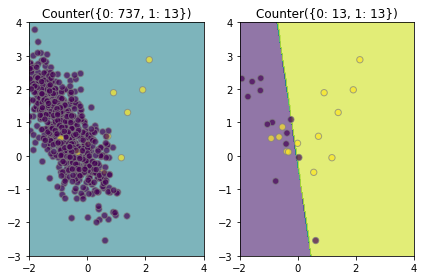

In [10]:
X, y = RandomUnderSampler(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [11]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.69      0.85      0.76        13
          1       0.80      0.62      0.70        13

avg / total       0.74      0.73      0.73        26



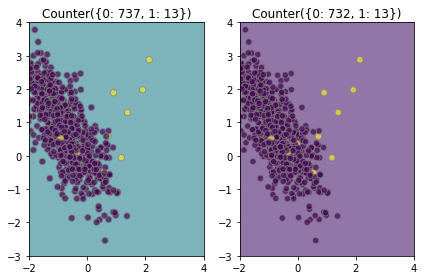

In [12]:
X, y = TomekLinks(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [13]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       732
          1       0.00      0.00      0.00        13

avg / total       0.97      0.98      0.97       745



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


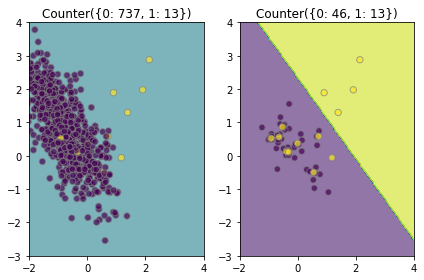

In [14]:
X, y = CondensedNearestNeighbour(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [15]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91        46
          1       1.00      0.31      0.47        13

avg / total       0.87      0.85      0.81        59



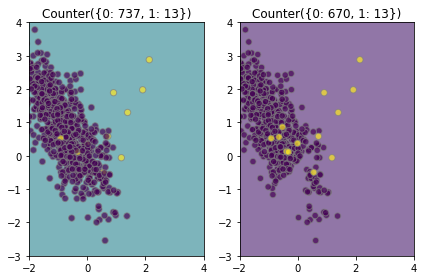

In [16]:
X, y = OneSidedSelection(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [17]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       670
          1       0.00      0.00      0.00        13

avg / total       0.96      0.98      0.97       683



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


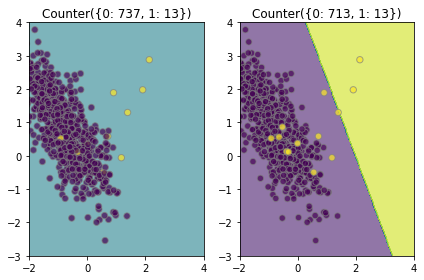

In [18]:
X, y = EditedNearestNeighbours(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [19]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       713
          1       1.00      0.15      0.27        13

avg / total       0.99      0.98      0.98       726



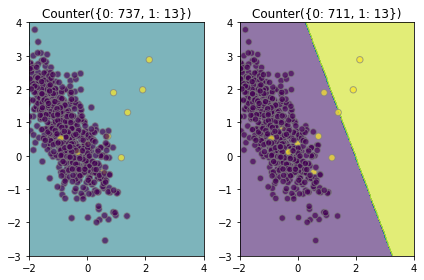

In [20]:
X, y = NeighbourhoodCleaningRule(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [21]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       711
          1       1.00      0.15      0.27        13

avg / total       0.99      0.98      0.98       724



## 2.2. Over-Sampling
* `RandomOverSampler`: random sampler
* `ADASYN`: Adaptive Synthetic Sampling Approach for Imbalanced Learning
* `SMOTE`: Synthetic Minority Over-sampling Technique

In [22]:
from imblearn.over_sampling import *

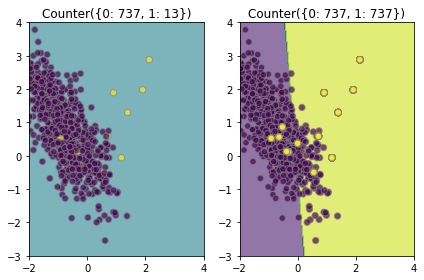

In [23]:
X, y = RandomOverSampler(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [24]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.68      0.83      0.75       737
          1       0.78      0.60      0.68       737

avg / total       0.73      0.72      0.71      1474



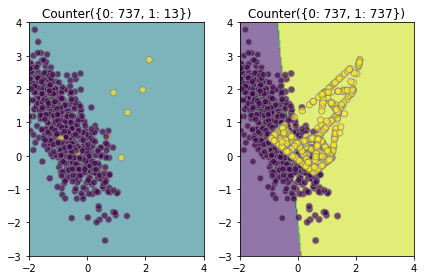

In [25]:
X, y = ADASYN(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [26]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.63      0.78      0.70       737
          1       0.71      0.55      0.62       737

avg / total       0.67      0.66      0.66      1474



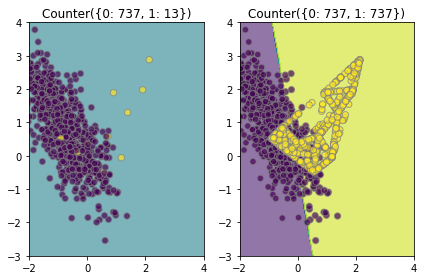

In [27]:
X, y = SMOTE(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [28]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.68      0.81      0.74       737
          1       0.77      0.62      0.68       737

avg / total       0.72      0.72      0.71      1474



## 2.3. Combined Sampling
* `SMOTEENN`: SMOTE + ENN
* `SMOTETomek`: SMOTE + Tomek

In [29]:
from imblearn.combine import *

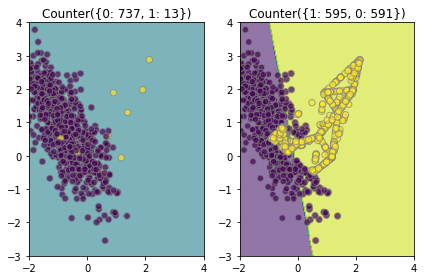

In [30]:
X, y = SMOTEENN(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [31]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.86      0.79       591
          1       0.83      0.68      0.75       595

avg / total       0.78      0.77      0.77      1186



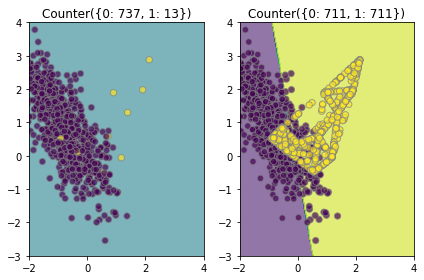

In [32]:
X, y = SMOTETomek(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [33]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.69      0.82      0.75       711
          1       0.78      0.63      0.69       711

avg / total       0.73      0.72      0.72      1422

